# Logistic Regression Primer

Logistic Regression applies a regression methodology with Logistic Function (Sigmoid Function) to conduct a binary classification analysis.

It may sound oxymoronic to suggest a regression model for classification analysis. Despite its paradoxical name, it has solid real-life applications. Here is how.

While the dependent variable of linear regression is unbounded, Logistic Function (Logistic Function (Sigmoid Function)) projects a bounded mapping of a continuous variable of an infinite range (-∞, ∞) into a bounded range within (0, 1): positive values between 0 and 1. Since the bounded range corresponds to the range of the probability, the regression result can be interpreted as the probability of an event. And using a probabilistic threshold, we can project the probability outputs into a Bernoulli variable, which represents two classes of the results of a binary classification. This is the reason why this method has a confusing name: a regression model for a binary classification application. 
Now, we have a classification objective of the binary loan statuses: non-default and default. Now, we assign Bernoulli variable, class 0 and class 1, to non-default and default statuses respectively in the binary classification objective. Let Y denote the probability of being in class 1 (default case). 

As a precaution, Y is not the ultimate goal that we want to predict, which is a binary classification. We need to set a probabilistic threshold to map Y to the Bernoulli variable, V consisting of class 0 or class 1. V is our ultimate objective. Y is an intermediary product of the Logistic Regression.

Now, the higher the value of Y, the more chance of default; the lower the value of Y, the lower chance of default.
Odds of being in class 1 as opposed to class 0 can be calculated as:
> Y/(1-Y)

Logistic regression measures the logarithm of the odds and plugs in the dependent variable in the linear regression formula as below. 
> ln⁡[  Y/(1-Y)  ]=w*X+b

We can transform this equation as follows.
> Y =  e^z/(1+ e^z )=   1/(1+ e^(-z) ),where z=w*X+b 

This is called Logistic Function (Sigmoid Function), σ(z). Therefore, Y can be described by Logistic Function (Sigmoid Function) as follows.

>Y = σ(w*X+b)

> “In the case of the logistic regression model, it is not appropriate to apply the method of least squares that is used in linear regression. Using the fact that the variable Y has a known (binomial) distribution, the parameters are estimated with the maximum likelihood method.
It is not possible to give an algebraic expression for the estimators of the parameters. The estimators are obtained by iteratively solving a system of equations, called maximum likelihood equations.” (Girimonte, n.d., p. 3)

That’s a quick summary of the theoretical profile of Logistic Function (Sigmoid Function). 


In [ ]:
# import tensorflow as tf
# from tensorflow import keras

# import os
# import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score




In [ ]:
%matplotlib inline

## 01 Dataset

The default historical dataset is obtained from the source in the link below.
- Source: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-default#:~:text=The%20Default%20data%20set%20is,into%20a%20variable%20called%20Default.
- Dataset link: https://r-data.pmagunia.com/system/files/datasets/dataset-63314.csv


In [ ]:
df_original = pd.read_csv('https://r-data.pmagunia.com/system/files/datasets/dataset-63314.csv')

In [ ]:
df=df_original.copy()

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(10000, 4)

In [ ]:
df.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


## 02 Data Preprocessing



### 02.a Check Missing Values


In [ ]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

### 02.b Check the Distribution of Data


In [ ]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


<AxesSubplot:>

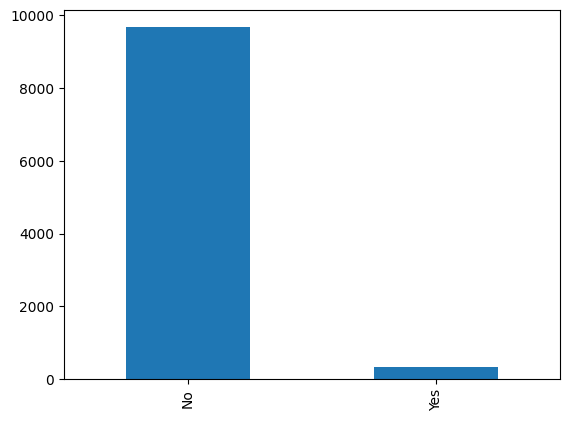

In [ ]:
df['default'].value_counts().plot.bar()

<AxesSubplot:>

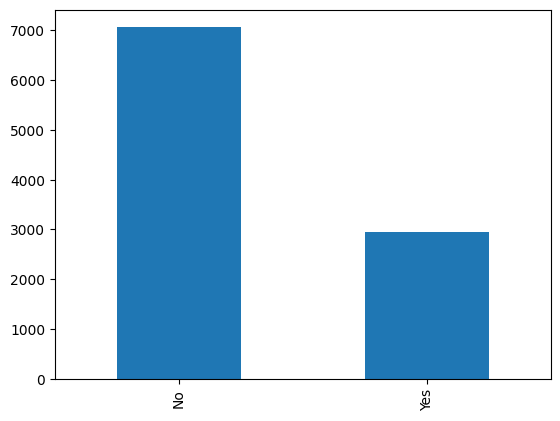

In [ ]:
df['student'].value_counts().plot.bar()

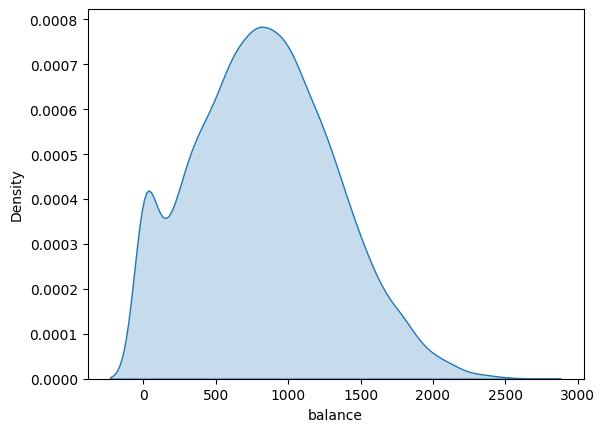

In [ ]:
sns.kdeplot(df['balance'],shade=True)
plt.show()

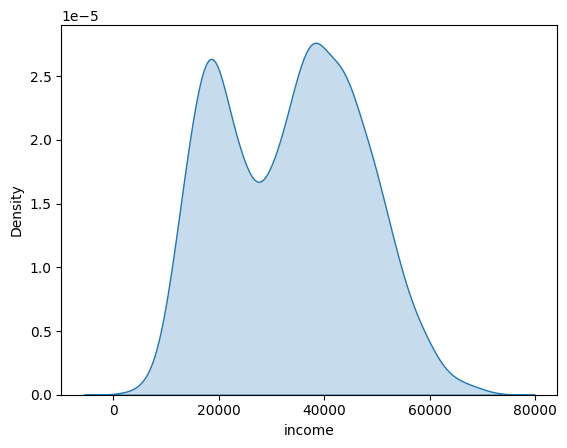

In [ ]:
sns.kdeplot(df['income'],shade=True)
plt.show()

### 02.c Transform Categorical Data into Numeric Data

In [ ]:
default=df['default'].unique()
default

array(['No', 'Yes'], dtype=object)

In [ ]:
df['default'].replace(to_replace=default, value=[0, 1], inplace=True)
df['default'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['default'].head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [ ]:
df['student'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['student'].head()

0     No
1    Yes
2     No
3     No
4     No
Name: student, dtype: object

In [ ]:
df['student'].replace(to_replace=default, value=[0, 1], inplace=True)
df['student'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['student'].head()

0    0
1    1
2    0
3    0
4    0
Name: student, dtype: int64

### 02.d Data Split

Use `train_test_split()` from sklearn to split and shuffle your dataset.

In [ ]:

train_df, test_df = train_test_split(df, test_size=0.3)
#train_df, val_df = train_test_split(train_df, test_size=0.3)

In [ ]:
train_df.shape

(7000, 4)

In [ ]:
test_df.shape

(3000, 4)

## 03. Implementation of Logistic Regression
### Training
#### Statsmodel's GLM
We can use the statsmodels fomula API's Generalized Linear Regression Model, glm, with the family setting of binomial (`sm.families.Binomial()`) to conduct Logistic Regression.
You can refer to the details for the application.

Source: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html

Also, here is the link for the documentation of the API.

Documentation: https://www.statsmodels.org/dev/examples/notebooks/generated/glm_formula.html



In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


Define Logistic Regression Function using Generalized Linear Regression Model.

In [ ]:

def logistic(data, formula):
    model = smf.glm(formula = formula, data=data, family=sm.families.Binomial())
    result = model.fit()
    summary=result.summary()
    return summary, result


Let's train "Model 1".  

In [ ]:
Model_1 = 'default ~ balance'

Model_1_summary, Model_1_train_result = logistic(train_df, Model_1)

In [ ]:
Model_1_train_result

In [ ]:
print(Model_1_summary)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -590.80
Date:                Tue, 13 Dec 2022   Deviance:                       1181.6
Time:                        10:37:32   Pearson chi2:                 5.36e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.2946      0.407    -25.293      0.0

The trained model is as follows:

> Prob[default] =  σ(0.0054 * balance - 10.4324)  (Model 1 Formula)
where σ represents Sigmoid (logistic function), which is the inverse of the logit function.

The interpretation of the statistical results

1) Intercept:

- z-score of the intercept (-25.313) is negative and its absolute value is very large.
- p-value is negligible

2) Balance:

- z-score of `balance` (21.411) is positive and its absolute value is very large. 
- p-value is negligible

The statistical significances of the results are sound for both the intercept and the independent variable.

There is no reason to reject the regression result above (Model 1 Formula).

Reference: https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm


Let's train "Model 3".  

In [ ]:
Model_3 = 'default ~ balance + student'

Model_3_summary, Model_3_train_result = logistic(train_df, Model_3)

In [ ]:
print(Model_3_summary)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -580.19
Date:                Tue, 13 Dec 2022   Deviance:                       1160.4
Time:                        10:37:32   Pearson chi2:                 5.19e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4081      0.418    -24.904      0.0

The trained model is as follows:

> Prob[default] = σ(0.0056 * balance - 0.697 * student- 10.5308) (Model 3 Formula)

where σ represents Sigmoid (logistic function), which is the inverse of the logit function.

The interpretation of the statistical results

1) Intercept:

- z-score of the intercept (-25.009) is negative and its absolute value is very large.
- p-value is negligible

2) Balance:

- z-score of `balance` (21.239) is positive and its absolute value is very large. 
- p-value is negligible

3) Student:

- z-score of `student` (-4.104) is positive and its absolute value is sufficiently large. 
- p-value is negligible

The statistical significances of the results are sound for the intercept and these two independent variables.

There is no reason to reject the regression result above (Model 3 Formula).

Reference: https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm


## ROC

ROC curve visually displays the ability of a binary classification model to correctly separate positives and negatives. An ROC curve is a graph of true positive rate on the Y-axis and false positive rate on the X-axis. 
True positive rate is also called ‘recall’ and calculated based on the following formula:
> True Positive Rate/Recall=(True Positives)/(True Positives+False Negatives)

False positive rate is calculated based on the following formula:

> False Positive Rate=(False Positives)/(False Positives+True Negatives)

>“The shape of an ROC curve suggests a binary classification model's ability to separate positive classes from negative classes.”   (Google Developers, n.d.)
https://developers.google.com/machine-learning/glossary#roc-receiver-operating-characteristic-curve




## AUC: Area under the ROC curve 

As a binary classification model improves its ability to correctly separate positives and negatives, the area under the ROC curve above approaches 1.0. 
In this sense, the area under the ROC curve summarises the result of ROC curve and measures the ability of a binary classification model to correctly separate positives and negatives.


Now split the train dataset into the Feature vector, X_train, and the label, y_train

In [ ]:
X_train = train_df[["student", "balance", "income"]]
y_train = train_df[["default"]]
y_train.head()

,default
1202,0
2335,0
8785,0
9294,0
6827,0


Now split the test dataset into the Feature vector, X_test, and the label, y_test


In [ ]:
X_test = test_df[["student", "balance", "income"]]
y_test = test_df[["default"]]
y_test.head()

,default
5195,0
9549,0
3082,0
9343,0
6961,0


#### 2) Validate "Model 1" to the test dataset 

In [ ]:
X_train_M1 =X_train[['balance']]
X_test_M1 =X_test[['balance']]
Predictions_M1 = Model_1_train_result.predict(X_test_M1)

In [ ]:
def plot_cm(labels, predictions, p, model):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('{}: Confusion matrix @{:.2f}'.format(model, p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Non-Default Correctly Detected (True Negatives): ', cm[0][0])
  print('Non-Default Incorrectly Detected (False Positives): ', cm[0][1])
  print('Default Missed (False Negatives): ', cm[1][0])
  print('Default Correctly Detected (True Positives): ', cm[1][1])
  print('Total Default Cases: ', np.sum(cm[1]))
  print('True Positive Rate (Recall): {:.4f}'.format(cm[1][1]/(cm[1][1]+cm[1][0])))
  print('False Positive Rate: {:.4f}'.format(cm[0][1]/(cm[0][1]+cm[0][0])))  

Non-Default Correctly Detected (True Negatives):  2897
Non-Default Incorrectly Detected (False Positives):  12
Default Missed (False Negatives):  61
Default Correctly Detected (True Positives):  30
Total Default Cases:  91
True Positive Rate (Recall): 0.3297
False Positive Rate: 0.0041


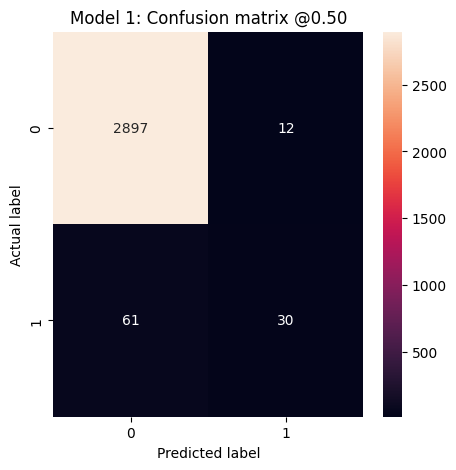

In [ ]:
plot_cm(y_test, Predictions_M1, p=0.5, model="Model 1")

In [ ]:
def plot_roc(train_test, labels, predictions, **kwargs):
  fpr, tpr, _ = sklearn.metrics.roc_curve(labels, predictions)
  roc_auc = auc(fpr, tpr)


  #plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.plot(fpr, tpr, label="{} ROC curve (AUC = {:0.2f})".format(train_test, roc_auc), linewidth=2, **kwargs)
#  plt.plot(fpr[::10], tpr[::10], marker='h') 
  plt.xlabel('1-Specificity [%]')
  plt.ylabel('Sensitivity [%]')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')  

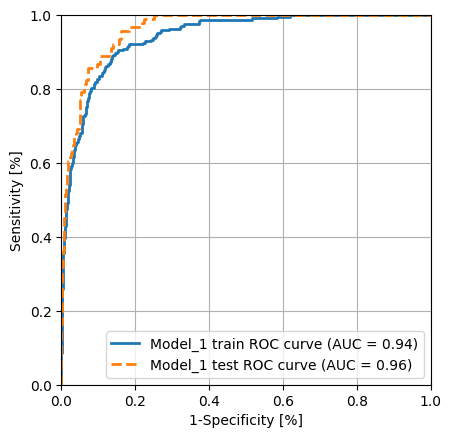

In [ ]:
plot_roc(train_test= "Model_1 train", labels=y_train, predictions=Model_1_train_result.predict(X_train_M1))
plot_roc(train_test= "Model_1 test", labels=y_test, predictions=Predictions_M1, linestyle='--')
plt.legend(loc='lower right');

### 3) Validate "Model 3" to the test dataset 

In [ ]:
X_train_M3 =X_train[['balance','student']]
X_test_M3 =X_test[['balance','student']]
Predictions_M3 = Model_3_train_result.predict(X_test_M3)

Non-Default Correctly Detected (True Negatives):  2896
Non-Default Incorrectly Detected (False Positives):  13
Default Missed (False Negatives):  59
Default Correctly Detected (True Positives):  32
Total Default Cases:  91
True Positive Rate (Recall): 0.3516
False Positive Rate: 0.0045


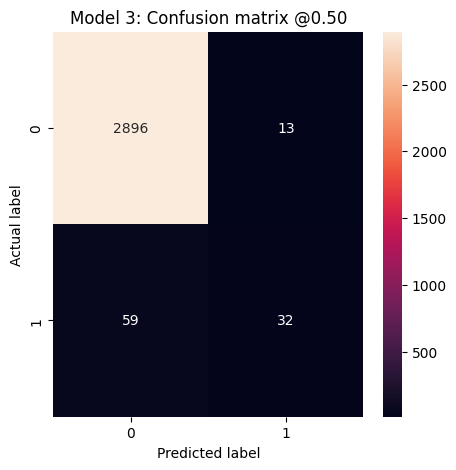

In [ ]:
plot_cm(y_test, Predictions_M3, p=0.5, model="Model 3")

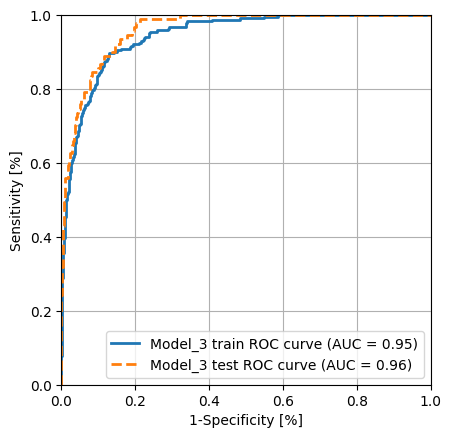

In [ ]:
plot_roc(train_test= "Model_3 train", labels=y_train, predictions=Model_3_train_result.predict(X_train_M3))
plot_roc(train_test= "Model_3 test", labels=y_test, predictions=Predictions_M3, linestyle='--')
plt.legend(loc='lower right');

# <font color=red> End